In [66]:
import pandas as pd

In [67]:
pd.options.display.float_format = '{:,.2f}'.format

In [68]:
rates = pd.read_csv("cleaned/rates.csv")

rates

,jurisdiction,slug,country,location,season,total,mealsAndIncidentals
0,Canada,albania-tirana,Albania,Tirana,NaN,42.38,nan
1,Canada,albania,Albania,Other,NaN,33.90,nan
2,Canada,algeria-algiers,Algeria,Algiers,NaN,134.44,nan
3,Canada,algeria,Algeria,Other,NaN,107.56,nan
4,Canada,angola-luanda,Angola,Luanda,NaN,262.80,nan
5,Canada,angola,Angola,Other,NaN,210.24,nan
6,Canada,anguilla-the-valley,Anguilla,The Valley,NaN,174.44,nan
7,Canada,antigua-and-barbuda-st.-john's,Antigua and Barbuda,St. John's,NaN,226.45,nan
8,Canada,argentina-buenos-aires,Argentina,Buenos Aires,NaN,95.03,nan
9,Canada,argentina,Argentina,Other,NaN,76.02,nan


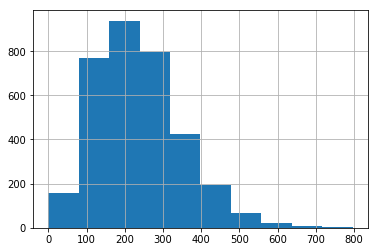

In [69]:
rates['total'].hist()

In [70]:
capitals = pd.read_csv("cleaned/capitals.csv")

capitals

,Short-form name,Long-form name,GENC 2A Code (see Note 2),GENC 3A Code (see Note 2),Capital,slug
0,Afghanistan *+,Islamic Republic of Afghanistan,AF,AFG,Kabul,afghanistan-kabul
1,Albania *+,Republic of Albania,AL,ALB,Tirana,albania-tirana
2,Algeria *+,People's Democratic Republic of Algeria,DZ,DZA,Algiers,algeria-algiers
3,Andorra *+,Principality of Andorra,AD,AND,Andorra la Vella,andorra-andorra-la-vella
4,Angola *+,Republic of Angola,AO,AGO,Luanda,angola-luanda
5,Antigua and\nBarbuda *+,Antigua and Barbuda,AG,ATG,Saint John's,antigua-and-barbuda-saint-john's
6,Argentina *+,Argentine Republic,AR,ARG,Buenos Aires,argentina-buenos-aires
7,Armenia *+,Republic of Armenia,AM,ARM,Yerevan,armenia-yerevan
8,Australia *+,Commonwealth of Australia,AU,AUS,Canberra,australia-canberra
9,Austria *+,Republic of Austria,AT,AUT,Vienna,austria-vienna


In [71]:
us_rates = rates[rates['jurisdiction'] == 'US'].copy()

us_rates = us_rates.merge(capitals[['slug']], on='slug', how='inner').reset_index()

eu_rates = rates[rates['jurisdiction'] == 'EU'].copy()

other_rates = rates[~rates['jurisdiction'].isin(['US','EU'])].copy()

us_vs_other_rates = us_rates.merge(other_rates, on='slug', how='inner').reset_index()

eu_rates['country'] = eu_rates['country'].str.upper()

us_vs_eu_rates = us_rates.merge(eu_rates, on='country', how='inner').reset_index()

us_vs_other_rates = pd.concat([us_vs_other_rates,us_vs_eu_rates], ignore_index=True)

us_vs_other_rates

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y
0,NaN,AFGHANISTAN,AFGHANISTAN,0,US,UK,0,Kabul,Kabul,33.00,nan,S1,NaN,afghanistan-kabul,NaN,NaN,33.00,125.50
1,NaN,AFGHANISTAN,Afghanistan,0,US,UN,1,Kabul,Kabul,33.00,nan,S1,NaN,afghanistan-kabul,NaN,NaN,33.00,162.00
2,NaN,AFGHANISTAN,Afghanistan,0,US,UN,2,Kabul,Kabul (Kabul Serena),33.00,nan,S1,NaN,afghanistan-kabul,NaN,NaN,33.00,290.00
3,NaN,ALBANIA,Albania,1,US,Canada,3,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,42.38
4,NaN,ALBANIA,ALBANIA,1,US,UK,4,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,223.89
5,NaN,ALBANIA,Albania,1,US,UN,5,Tirana,Tirana,95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,147.00
6,NaN,ALBANIA,Albania,1,US,UN,6,Tirana,Tirana (Rogner),95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,165.00
7,NaN,ALBANIA,Albania,1,US,UN,7,Tirana,Tirana (Sheraton),95.00,nan,S1,NaN,albania-tirana,NaN,NaN,285.00,193.00
8,NaN,ALGERIA,Algeria,2,US,Canada,8,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,134.44
9,NaN,ALGERIA,ALGERIA,2,US,UK,9,Algiers,Algiers,75.00,nan,S1,NaN,algeria-algiers,NaN,NaN,255.00,286.55


In [72]:
us_vs_other_rates['diff'] = (us_vs_other_rates['total_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['total_x']

us_vs_other_rates.loc[us_vs_other_rates['jurisdiction_y'] == 'Canada','diff'] = (us_vs_other_rates['mealsAndIncidentals_x'] - us_vs_other_rates['total_y']) / us_vs_other_rates['mealsAndIncidentals_x']


In [73]:
us_vs_other_rates['diff'].describe()

count   605.00
mean     -0.19
std       2.37
min     -39.55
25%      -0.12
50%       0.10
75%       0.26
max       1.00
Name: diff, dtype: float64

In [74]:
us_vs_other_rates[us_vs_other_rates['diff'] < -10]

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
204,NaN,IRAQ,Iraq,65,US,UN,204,Baghdad,Baghdad,11.00,nan,S1,NaN,iraq-baghdad,NaN,NaN,11.00,275.00,-24.00
205,NaN,IRAQ,Iraq,65,US,UN,205,Baghdad,Baghdad (Al Rasheed Hotel),11.00,nan,S1,NaN,iraq-baghdad,NaN,NaN,11.00,446.00,-39.55
253,NaN,LIBYA,Libya,81,US,UN,253,Tripoli,"Tripoli (Albustan, Corinthia, Radisson Blu)",21.00,nan,S1,NaN,libya-tripoli,NaN,NaN,21.00,335.00,-14.95
531,IRAQ,NaN,NaN,65,US,EU,60,Baghdad,NaN,11.00,nan,S1,NaN,NaN,iraq-baghdad,iraq,11.00,303.31,-26.57


In [75]:
us_vs_other_rates[us_vs_other_rates['diff'] > 0.9]

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
407,NaN,SYRIA,Syria,130,US,Canada,407,Damascus,Damascus,108.00,nan,S1,NaN,syria-damascus,NaN,NaN,344.00,0.03,1.00
458,NaN,VENEZUELA,VENEZUELA,146,US,UK,458,Caracas,Caracas,261.00,nan,S1,NaN,venezuela-caracas,NaN,NaN,575.00,0.06,1.00


In [76]:
us_vs_other_rates.loc[us_vs_other_rates['slug'].isnull(),'slug'] = us_vs_other_rates['slug_y']

min_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].min()).reset_index()

min_diff.groupby('jurisdiction_y').describe()

diff                                        
                count  mean  std    min   25%   50%  75%  max
jurisdiction_y                                               
Canada         131.00 -0.12 0.58  -5.77 -0.27 -0.06 0.10 1.00
EU             132.00 -0.15 2.41 -26.57 -0.00  0.13 0.26 0.72
UK             115.00  0.19 0.36  -2.80  0.10  0.22 0.34 1.00
UN             119.00 -0.58 3.94 -39.55 -0.25  0.05 0.21 0.75

In [77]:
max_diff = pd.DataFrame(us_vs_other_rates.groupby(['slug','jurisdiction_y'])['diff'].max()).reset_index()

max_diff.groupby('jurisdiction_y').describe()

diff                                        
                count  mean  std    min   25%   50%  75%  max
jurisdiction_y                                               
Canada         131.00 -0.11 0.58  -5.77 -0.26 -0.06 0.10 1.00
EU             132.00 -0.15 2.41 -26.57  0.01  0.13 0.26 0.72
UK             115.00  0.19 0.36  -2.80  0.10  0.22 0.35 1.00
UN             119.00 -0.13 2.42 -24.00  0.04  0.18 0.37 0.79

In [79]:
us_vs_other_rates.sample(n=3)

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
290,NaN,MOROCCO,Morocco,93,US,UN,290,Rabat,Rabat (Sofitel Jardin des Roses),114.00,nan,S1,NaN,morocco-rabat,NaN,NaN,274.00,392.00,-0.43
603,ZAMBIA,NaN,NaN,149,US,EU,132,Lusaka,NaN,95.00,nan,S1,NaN,zambia,zambia-lusaka,zambia,285.00,228.65,0.20
45,NaN,BELARUS,BELARUS,12,US,UK,45,Minsk,Minsk,84.00,nan,S1,NaN,belarus-minsk,NaN,NaN,274.00,240.00,0.12


In [80]:
us_vs_other_rates[us_vs_other_rates['jurisdiction_y'] == 'Canada'].sample(n=1)

,country,country_x,country_y,index,jurisdiction_x,jurisdiction_y,level_0,location_x,location_y,mealsAndIncidentals_x,mealsAndIncidentals_y,season_x,season_y,slug,slug_x,slug_y,total_x,total_y,diff
132,NaN,FIJI,Fiji,44,US,Canada,132,Suva,Suva,102.00,nan,S1,NaN,fiji-suva,NaN,NaN,305.00,137.76,-0.35


In [81]:
us_vs_other_rates.to_csv('results.csv')